## Machine Learning

![](../img/machine_learning.png)

### Scikit-LLM: Supercharge Text Analysis with ChatGPT and scikit-learn Integration 

In [ ]:
!pip install scikit-llm

To integrate advanced language models with scikit-learn for enhanced text analysis tasks, use Scikit-LLM.

Scikit-LLM's `ZeroShotGPTClassifier` enables text classification on unseen classes without requiring re-training. 

In [5]:
from skllm.config import SKLLMConfig

SKLLMConfig.set_openai_key("<YOUR_KEY>")
SKLLMConfig.set_openai_org("<YOUR_ORGANISATION>")

In [12]:
from skllm.datasets import get_classification_dataset
from skllm import ZeroShotGPTClassifier

# demo sentiment analysis dataset
# labels: positive, negative, neutral
X, y = get_classification_dataset()

clf = ZeroShotGPTClassifier(openai_model="gpt-3.5-turbo")
clf.fit(X, y)
labels = clf.predict(X)

100%|██████████| 30/30 [00:36<00:00,  1.22s/it]


In [20]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y, labels):.2f}")

Accuracy: 0.93


[Link to Scikit-LLM](https://github.com/iryna-kondr/scikit-llm).

### Create a Readable Machine Learning Pipeline in One Line of Code

If you want to create a readable machine learning pipeline in a single line of code, try the `make_pipeline` function in scikit-learn.
`make_pipeline` is especially useful when working with complex pipelines that involve many different transformers and estimators.

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a pipeline that scales the data and fits a logistic regression model
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
pipeline.score(X_test, y_test)


0.96

### Pipeline + GridSearchCV: Prevent Data Leakage when Scaling the Data

Scaling the data before using GridSearchCV can lead to data leakage since the scaling tells some information about the entire data. To prevent this, assemble both the scaler and machine learning models in a pipeline then use it as the estimator for GridSearchCV. 

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# load data
df = load_iris()
X = df.data
y = df.target

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a pipeline variable
make_pipe = make_pipeline(StandardScaler(), SVC())

# Defining parameters grid
grid_params = {"svc__C": [0.1, 1, 10, 100, 1000], "svc__gamma": [0.1, 1, 10, 100]}

# hypertuning
grid = GridSearchCV(make_pipe, grid_params, cv=5)
grid.fit(X_train, y_train)

# predict
y_pred = grid.predict(X_test)

<IPython.core.display.Javascript object>

The estimator is now the entire pipeline instead of just the machine learning model.

### squared=False: Get RMSE from Sklearn’s mean_squared_error method

To obtain the root mean squared error (RMSE) using scikit-learn, use the `squared=False` parameter in the `mean_squared_error` method.

In [42]:
from sklearn.metrics import mean_squared_error

y_actual = [1, 2, 3]
y_predicted = [1.5, 2.5, 3.5]
rmse = mean_squared_error(y_actual, y_predicted, squared=False)
rmse

0.5

<IPython.core.display.Javascript object>

### modelkit: Build Production ML Systems in Python

In [ ]:
!pip install modelkit textblob 

If you want your ML models to be fast, type-safe, testable, and fast to deploy to production, try modelkit. modelkit allows you to incorporate all of these features into your model in several lines of code. 

In [6]:
from modelkit import ModelLibrary, Model 
from textblob import TextBlob, WordList
# import nltk
# nltk.download('brown')
# nltk.download('punkt')

To define a modelkit Model, you need to:

- create class inheriting from `modelkit.Model`
- implement a `_predict` method

In [24]:
class NounPhraseExtractor(Model):

    # Give model a name
    CONFIGURATIONS = {"noun_phrase_extractor": {}}

    def _predict(self, text):
        blob = TextBlob(text)
        return blob.noun_phrases

<IPython.core.display.Javascript object>

You can now instantiate and use the model:

In [25]:
noun_extractor = NounPhraseExtractor()
noun_extractor("What are your learning strategies?")

2021-11-05 09:55.55 [debug    ] Model loaded                   memory=0 Bytes memory_bytes=0 model_name=None time=0 microseconds time_s=4.232699939166196e-05


WordList(['learning strategies'])

<IPython.core.display.Javascript object>

You can also create test cases for your model and make sure all test cases are passed. 

In [26]:
class NounPhraseExtractor(Model):

    # Give model a name
    CONFIGURATIONS = {"noun_phrase_extractor": {}}

    TEST_CASES = [
        {"item": "There is a red apple on the tree", "result": WordList(["red apple"])}
    ]

    def _predict(self, text):
        blob = TextBlob(text)
        return blob.noun_phrases

<IPython.core.display.Javascript object>

In [27]:
noun_extractor = NounPhraseExtractor()
noun_extractor.test()

2021-11-05 09:55.58 [debug    ] Model loaded                   memory=0 Bytes memory_bytes=0 model_name=None time=0 microseconds time_s=4.3191997974645346e-05


TEST 1: SUCCESS

<IPython.core.display.Javascript object>

modelkit also allows you to organize a group of models using `ModelLibrary`.

In [18]:
class SentimentAnalyzer(Model):
    
    # Give model a name
    CONFIGURATIONS = {"sentiment_analyzer": {}}

    def _predict(self, text):
        blob = TextBlob(text)
        return blob.sentiment

In [19]:
nlp_models = ModelLibrary(models=[NounPhraseExtractor, SentimentAnalyzer])

2021-11-05 09:50.13 [info     ] Instantiating AssetsManager    lazy_loading=False
2021-11-05 09:50.13 [info     ] No remote storage provider configured
2021-11-05 09:50.13 [debug    ] Resolving asset for Model      model_name=sentiment_analyzer
2021-11-05 09:50.13 [debug    ] Loading model                  model_name=sentiment_analyzer
2021-11-05 09:50.13 [debug    ] Instantiating Model object     model_name=sentiment_analyzer
2021-11-05 09:50.13 [debug    ] Model loaded                   memory=0 Bytes memory_bytes=0 model_name=sentiment_analyzer time=0 microseconds time_s=3.988200114690699e-05
2021-11-05 09:50.13 [debug    ] Done loading Model             model_name=sentiment_analyzer
2021-11-05 09:50.13 [info     ] Model and dependencies loaded  memory=0 Bytes memory_bytes=0 name=sentiment_analyzer time=0 microseconds time_s=0.00894871700074873
2021-11-05 09:50.13 [debug    ] Resolving asset for Model      model_name=noun_phrase_extractor
2021-11-05 09:50.13 [debug    ] Loading mode

Get and use the models from `nlp_models`.

In [20]:
noun_extractor = model_collections.get("noun_phrase_extractor")
noun_extractor("What are your learning strategies?")

WordList(['learning strategies'])

In [21]:
sentiment_analyzer = model_collections.get("sentiment_analyzer")
sentiment_analyzer("Today is a beautiful day!")

Sentiment(polarity=1.0, subjectivity=1.0)

[Link to modelkit](https://github.com/Cornerstone-OnDemand/modelkit/).

### Decomposing High-Dimensional Data into Two or Three Dimensions

In [ ]:
!pip install yellowbrick

If you want to decompose high dimensional data into two or three dimensions to visualize it, what should you do? A common technique is PCA. Even though PCA is useful, it can be complicated to create a PCA plot.

Lucikily, Yellowbrick allows you visualize PCA in a few lines of code

In [17]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA

<IPython.core.display.Javascript object>

In [18]:
X, y = load_credit()
classes = ["account in defaut", "current with bills"]

<IPython.core.display.Javascript object>

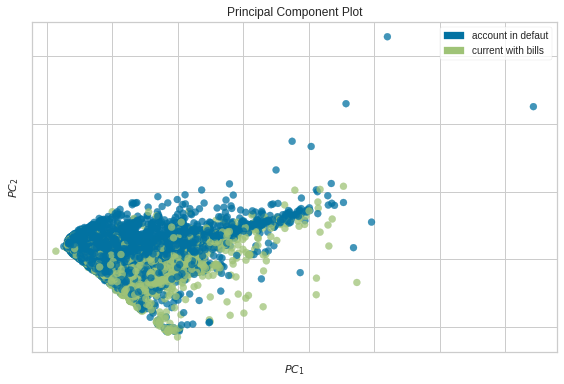

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

<IPython.core.display.Javascript object>

In [19]:
visualizer = PCA(scale=True, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show()

[Link to Yellowbrick](https://www.scikit-yb.org/en/latest/)

### Visualize Feature Importances with Yellowbrick

In [ ]:
!pip install yellowbrick

More features don't always mean a better model. Too many features can lead to overfitting. To improve your model, you might need to identify and eliminate less important features. Yellowbrick's `FeatureImportances` can help with this.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

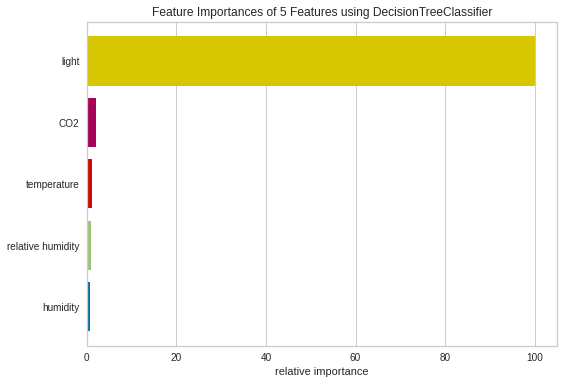

In [10]:
X, y = load_occupancy()

model = DecisionTreeClassifier()

viz = FeatureImportances(model)
viz.fit(X, y)
viz.show();

From the plot above, it seems like the light is the most important feature to DecisionTreeClassifier, followed by CO2, temperature.


[Link to Yellowbrick](https://www.scikit-yb.org/en/latest/)

### Validation Curve: Determine if an Estimator Is Underfitting Over Overfitting

In [ ]:
!pip install yellowbrick

To determine if your model is overfitting or underfitting, use Yellowbrick's validation curve. This technique helps find the optimal hyperparameter value where the model performs well on both training and validation sets.

In [14]:
from yellowbrick.datasets.loaders import load_occupancy
from yellowbrick.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier

import numpy as np 

In [15]:
# Load data
X, y = load_occupancy()

In the code below, we choose the range of `max_depth` to be from 1 to 11.

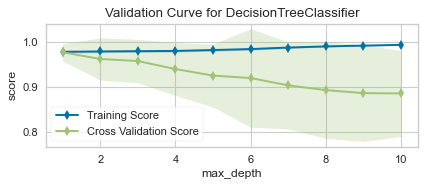

In [17]:
viz = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="f1",
)

As we can see from the plot above, although `max_depth` > 2 has a higher training score but a lower cross-validation score. This indicates that the model is overfitting. 

Thus, the sweet spot will be where the cross-validation score neither increases nor decreases, which is 2.

[Link to Yellowbrick](https://www.scikit-yb.org/en/latest/index.html).

### Mlxtend: Plot Decision Regions of Your ML Classifiers

In [ ]:
!pip install mlxtend  

To understand how your classifier makes decisions, plotting decision regions can be insightful. Mlxtend's `plot_decision_regions` function makes this easy.

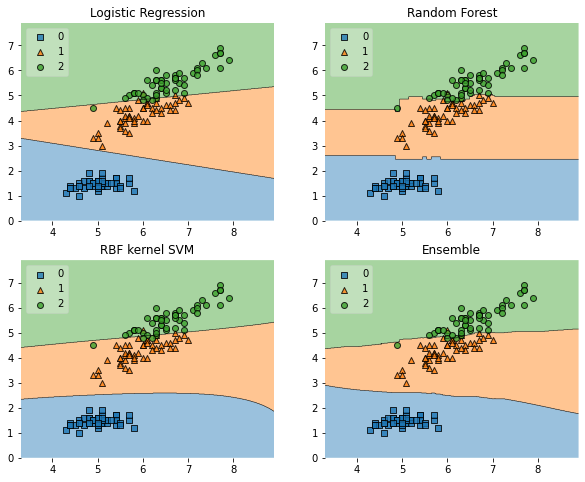

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

Mlxtend (machine learning extensions) is a Python library of useful tools for the day-to-day data science tasks. 

Find other useful functionalities of Mlxtend [here](https://github.com/rasbt/mlxtend).

### imbalanced-learn: Deal with an Imbalanced Dataset

In [ ]:
!pip install imbalanced-learn==0.10.0 mlxtend==0.21.0 scikit-learn==1.2.2

In machine learning, imbalanced datasets can lead to biased models that perform poorly on minority classes. This is particularly problematic in critical applications like fraud detection or disease diagnosis.

With imbalanced-learn, you can rebalance your dataset using various sampling techniques that work seamlessly with scikit-learn.

To demonstrate this, let's generate a sample dataset with 5000 samples, 2 features, and 4 classes:

In [1]:
import warnings

warnings.simplefilter("ignore", UserWarning)

In [1]:
# Libraries for plotting
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Libraries for machine learning
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from imblearn.over_sampling import RandomOverSampler

In [2]:
X, y = make_classification(
    n_samples=5000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=4,
    n_clusters_per_class=1,
    weights=[0.01, 0.04, 0.5, 0.90],
    class_sep=0.8,
    random_state=0,
)

Resample the dataset using the `RandomOverSampler` class from imbalanced-learn to balance the class distribution. This technique works by duplicating minority samples until they match the majority class.

In [3]:
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X, y)

Plot the decision regions of the dataset before and after resampling using a LinearSVC classifier:

/Users/khuyentran/book/venv/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/khuyentran/book/venv/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


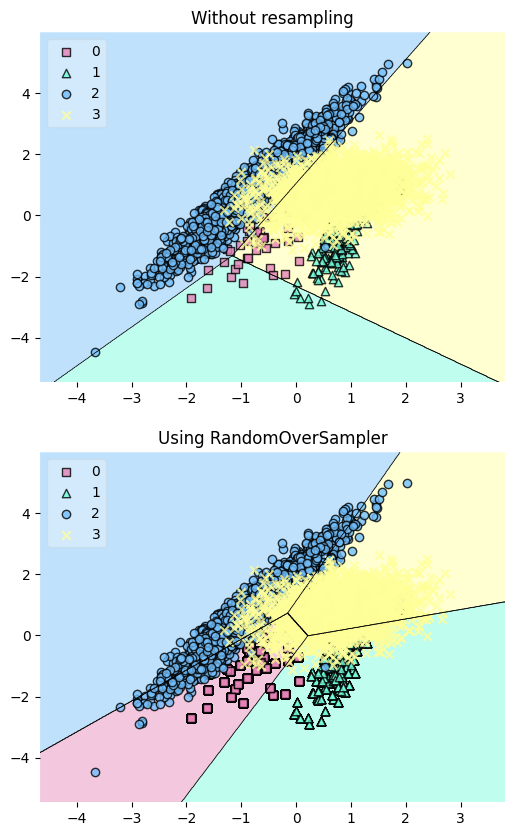

In [14]:
# Plotting Decision Regions
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharey=True, figsize=(6, 10))

for Xi, yi, ax, title in zip(
    [X, X_resampled],
    [y, y_resampled],
    [ax0, ax1],
    ["Without resampling", "Using RandomOverSampler"],
):
    clf = LinearSVC()
    clf.fit(Xi, yi)
    fig = plot_decision_regions(X=Xi, y=yi, clf=clf, legend=2, ax=ax, colors='#E583B6,#72FCDB,#72BEFA,#FFFF99')
    plt.title(title)
    ax.set_title(title, color='#000000')

The plot reveals that the resampling process has added more data points to the minority class (green), effectively balancing the class distribution.

[Link to imbalanced-learn](https://github.com/scikit-learn-contrib/imbalanced-learn).

### Estimate Prediction Intervals in Scikit-Learn Models with MAPIE 

In [ ]:
!pip install mapie

To estimate prediction intervals for scikit-learn models, use the MAPIE library:

In the code below, we use `MapieRegressor` to estimate prediction intervals for a scikit-learn regressor. 

In [26]:
from mapie.regression import MapieRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Create data
X, y = make_regression(n_samples=200, n_features=1, noise=50, random_state=0)

# Train and predict
alpha = [0.05, 0.32]
mapie = MapieRegressor(LinearRegression())
mapie.fit(X, y)
y_pred, y_pis = mapie.predict(X, alpha=alpha)


In [27]:
# compute the coverage of the prediction intervals
from mapie.metrics import regression_coverage_score

coverage_scores = [
    regression_coverage_score(y, y_pis[:, 0, i], y_pis[:, 1, i])
    for i, _ in enumerate(alpha)
]


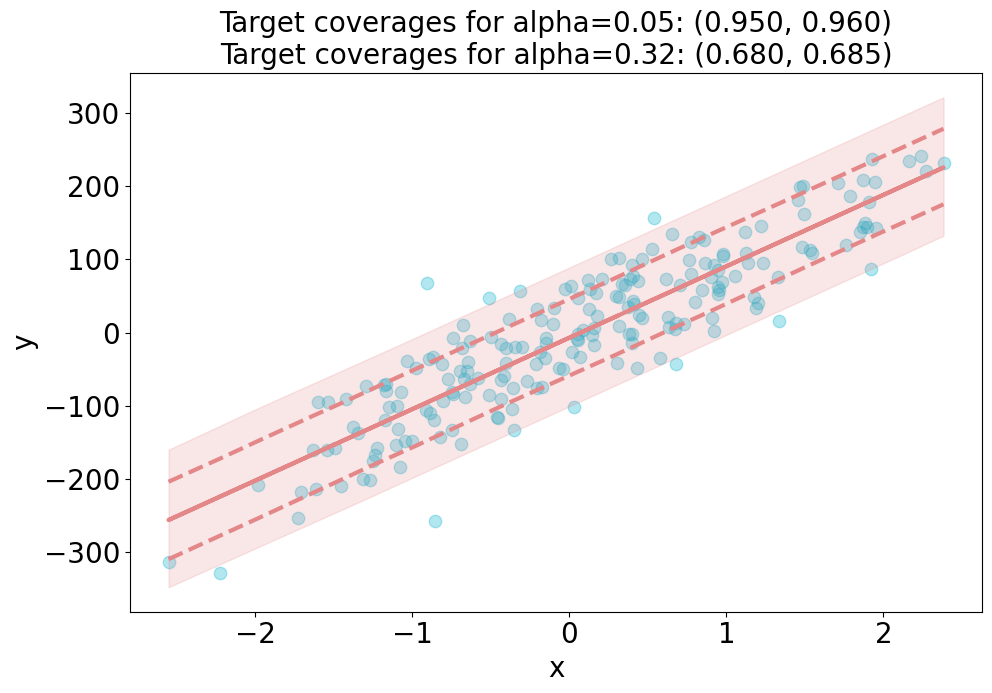

In [46]:
# Plot the estimated prediction intervals

from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(11, 7))
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.scatter(X, y, alpha=0.3, c='#06B1CF', s=80)
plt.plot(X, y_pred, color="#E48789", linewidth=3)
order = np.argsort(X[:, 0])
plt.plot(X[order], y_pis[order][:, 0, 1], color="#E48789", ls="--", linewidth=3)
plt.plot(X[order], y_pis[order][:, 1, 1], color="#E48789", ls="--", linewidth=3)
plt.fill_between(
    X[order].ravel(),
    y_pis[order][:, 0, 0].ravel(),
    y_pis[order][:, 1, 0].ravel(),
    alpha=0.2,
    color="#E48789"
)
plt.title(
    f"Target coverages for "
    f"alpha={alpha[0]:.2f}: ({1-alpha[0]:.3f}, {coverage_scores[0]:.3f})\n"
    f"Target coverages for "
    f"alpha={alpha[1]:.2f}: ({1-alpha[1]:.3f}, {coverage_scores[1]:.3f})",
    fontsize=20,
)
plt.show()


[Link to MAPIE](https://github.com/scikit-learn-contrib/MAPIE).

### mlforecast: Scalable Machine Learning for Time Series

If you want to perform time series forecasting using machine learning models and scale to massive amounts of data with distributed training, try mlforecast. 

```python
from mlforecast.distributed import DistributedMLForecast
from mlforecast.distributed.models.dask.lgb import DaskLGBMForecast
from mlforecast.target_transforms import Differences

# Create Dask Dataframe
series_ddf = ...

# Perform distributed training
fcst = DistributedMLForecast(
    models=DaskLGBMForecast(),
    freq='D', # daily frequency
    lags=[7], 
    target_transforms=[Differences([1])],
)
fcst.fit(series_ddf)
```

[Full code of the example above](https://nixtla.github.io/mlforecast/docs/quick_start_distributed.html).

[Link to mlforecast](https://github.com/Nixtla/mlforecast).

### MLEM: Capture Your Machine Learning Model's Metadata

In [ ]:
!pip install mlem 

The metadata of a machine learning model provides important information about the model such as:

- Hash value
- Model methods
- Input data schema
- Python requirements used to train the model. 

This information enables others to reproduce the model and its results. 

With MLEM, you can save both the model and its metadata in a single line of code.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [4]:
from mlem.api import save 

# Instead of joblib.dump(model, 'model/diabetes_model')
save(model, 'model/diabetes_model', sample_data=X_test)

MlemModel(location=Location(path='/Users/khuyentran/book/Efficient_Python_tricks_and_tools_for_data_scientists/Chapter5/model/diabetes_model.mlem', project=None, rev=None, uri='file:///Users/khuyentran/book/Efficient_Python_tricks_and_tools_for_data_scientists/Chapter5/model/diabetes_model.mlem', project_uri=None, fs=<fsspec.implementations.local.LocalFileSystem object at 0x16b631430>), params={}, artifacts={'data': LocalArtifact(uri='diabetes_model', size=563, hash='c57e456e8a0768326655a8b52cde4f47')}, requirements=Requirements(__root__=[InstallableRequirement(module='sklearn', version='1.2.1', package_name='scikit-learn', extra_index=None, source_url=None, vcs=None, vcs_commit=None), InstallableRequirement(module='numpy', version='1.24.2', package_name=None, extra_index=None, source_url=None, vcs=None, vcs_commit=None)]), processors_cache={'model': SklearnModel(model=LinearRegression(), io=SimplePickleIO(), methods={'predict': Signature(name='predict', args=[Argument(name='X', type_=

Running the code above will create two files: a model file and a metadata file.

```bash
model
 ├──  diabetes_model  
 └──  diabetes_model.mlem  
```

Here is what the metadata file looks like:

```yaml
# model/diabetes_model.mlem

artifacts:
  data:
    hash: c57e456e8a0768326655a8b52cde4f47
    size: 563
    uri: diabetes_model
call_orders:
  predict:
  - - model
    - predict
object_type: model
processors:
  model:
    methods:
      predict:
        args:
        - name: X
          type_:
            dtype: float64
            shape:
            - null
            - 10
            type: ndarray
        name: predict
        returns:
          dtype: float64
          shape:
          - null
          type: ndarray
    type: sklearn
requirements:
- module: sklearn
  package_name: scikit-learn
  version: 1.2.1
- module: numpy
  version: 1.24.2
```

[Link to MLEM](https://mlem.ai/).

[How to deploy your model with MLEM](https://towardsdatascience.com/automate-machine-learning-deployment-with-github-actions-f752766981b1?sk=6e234bb505e6bc426bb4760e4b20da1b).

### Distributed Machine Learning with MLlib

In [ ]:
!pip install pyspark

If you want to perform distributed machine learning tasks and handle large-scale datasets, use MLlib. It's designed to work seamlessly with Apache Spark, making it a powerful tool for scalable machine learning.

Similar to scikit-learn, MLlib provides the following tools:
- ML Algorithms: Classification, regression, clustering, and collaborative filtering
- Featurization: Feature extraction, transformation, dimensionality reduction, and selection
- Pipelines: Construction, evaluation, and tuning of ML Pipelines

In [6]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import LogisticRegression
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

# Prepare training data from a list of (label, features) tuples.
training = spark.createDataFrame(
    [
        (1.0, Vectors.dense([0.0, 1.1, 0.1])),
        (0.0, Vectors.dense([2.0, 1.0, -1.0])),
        (0.0, Vectors.dense([2.0, 1.3, 1.0])),
        (1.0, Vectors.dense([0.0, 1.2, -0.5])),
    ],
    ["label", "features"],
)

# Prepare test data
test = spark.createDataFrame(
    [
        (1.0, Vectors.dense([-1.0, 1.5, 1.3])),
        (0.0, Vectors.dense([3.0, 2.0, -0.1])),
        (1.0, Vectors.dense([0.0, 2.2, -1.5])),
    ],
    ["label", "features"],
)

# Create a LogisticRegression instance. This instance is an Estimator.
lr = LogisticRegression(maxIter=10, regParam=0.01)

# Learn a LogisticRegression model. This uses the parameters stored in lr.
model1 = lr.fit(training)

# Make predictions on test data using the Transformer.transform() method.
# LogisticRegression.transform will only use the 'features' column.
prediction = model1.transform(test)
result = prediction.select("features", "label", "probability", "prediction").collect()

for row in result:
    print(
        "features=%s, label=%s -> prob=%s, prediction=%s"
        % (row.features, row.label, row.probability, row.prediction)
    )


LogisticRegression parameters:
aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The bou

[Link to MLlib](https://spark.apache.org/docs/latest/ml-guide.html).

### Rapid Prototyping and Comparison of Basic Models with Lazy Predict

Lazy Predict enables rapid prototyping and comparison of multiple basic models without extensive manual coding or parameter tuning. 

This helps data scientists identify promising approaches and iterate on them more quickly.

```python
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y= data.target

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)
```
```bash
| Model                          |   Accuracy |   Balanced Accuracy |   ROC AUC |   F1 Score |   Time Taken |
|:-------------------------------|-----------:|--------------------:|----------:|-----------:|-------------:|
| LinearSVC                      |   0.989474 |            0.987544 |  0.987544 |   0.989462 |    0.0150008 |
| SGDClassifier                  |   0.989474 |            0.987544 |  0.987544 |   0.989462 |    0.0109992 |
| MLPClassifier                  |   0.985965 |            0.986904 |  0.986904 |   0.985994 |    0.426     |
| Perceptron                     |   0.985965 |            0.984797 |  0.984797 |   0.985965 |    0.0120046 |
| LogisticRegression             |   0.985965 |            0.98269  |  0.98269  |   0.985934 |    0.0200036 |
| LogisticRegressionCV           |   0.985965 |            0.98269  |  0.98269  |   0.985934 |    0.262997  |
| SVC                            |   0.982456 |            0.979942 |  0.979942 |   0.982437 |    0.0140011 |
| CalibratedClassifierCV         |   0.982456 |            0.975728 |  0.975728 |   0.982357 |    0.0350015 |
| PassiveAggressiveClassifier    |   0.975439 |            0.974448 |  0.974448 |   0.975464 |    0.0130005 |
| LabelPropagation               |   0.975439 |            0.974448 |  0.974448 |   0.975464 |    0.0429988 |
| LabelSpreading                 |   0.975439 |            0.974448 |  0.974448 |   0.975464 |    0.0310006 |
| RandomForestClassifier         |   0.97193  |            0.969594 |  0.969594 |   0.97193  |    0.033     |
| GradientBoostingClassifier     |   0.97193  |            0.967486 |  0.967486 |   0.971869 |    0.166998  |
| QuadraticDiscriminantAnalysis  |   0.964912 |            0.966206 |  0.966206 |   0.965052 |    0.0119994 |
| HistGradientBoostingClassifier |   0.968421 |            0.964739 |  0.964739 |   0.968387 |    0.682003  |
| RidgeClassifierCV              |   0.97193  |            0.963272 |  0.963272 |   0.971736 |    0.0130029 |
| RidgeClassifier                |   0.968421 |            0.960525 |  0.960525 |   0.968242 |    0.0119977 |
| AdaBoostClassifier             |   0.961404 |            0.959245 |  0.959245 |   0.961444 |    0.204998  |
| ExtraTreesClassifier           |   0.961404 |            0.957138 |  0.957138 |   0.961362 |    0.0270066 |
| KNeighborsClassifier           |   0.961404 |            0.95503  |  0.95503  |   0.961276 |    0.0560005 |
| BaggingClassifier              |   0.947368 |            0.954577 |  0.954577 |   0.947882 |    0.0559971 |
| BernoulliNB                    |   0.950877 |            0.951003 |  0.951003 |   0.951072 |    0.0169988 |
| LinearDiscriminantAnalysis     |   0.961404 |            0.950816 |  0.950816 |   0.961089 |    0.0199995 |
| GaussianNB                     |   0.954386 |            0.949536 |  0.949536 |   0.954337 |    0.0139935 |
| NuSVC                          |   0.954386 |            0.943215 |  0.943215 |   0.954014 |    0.019989  |
| DecisionTreeClassifier         |   0.936842 |            0.933693 |  0.933693 |   0.936971 |    0.0170023 |
| NearestCentroid                |   0.947368 |            0.933506 |  0.933506 |   0.946801 |    0.0160074 |
| ExtraTreeClassifier            |   0.922807 |            0.912168 |  0.912168 |   0.922462 |    0.0109999 |
| CheckingClassifier             |   0.361404 |            0.5      |  0.5      |   0.191879 |    0.0170043 |
| DummyClassifier                |   0.512281 |            0.489598 |  0.489598 |   0.518924 |    0.0119965 |
```

[Link to Lazy Predict](https://github.com/shankarpandala/lazypredict).

### AutoGluon: Fast and Accurate ML in 3 Lines of Code

The traditional scikit-learn approach requires extensive manual work, including data preprocessing, model selection, and hyperparameter tuning.

```python
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Preprocessing Pipeline
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Machine Learning Pipeline
model = RandomForestClassifier()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', model)
])

# Hyperparameter Tuning
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [5, 10, None],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.predict(X_test)
```

In contrast, AutoGluon automates these tasks, allowing you to train and deploy accurate models in 3 lines of code.

```python
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(label="class").fit(train_data)
predictions = predictor.predict(test_data)
```

[Link to AutoGluon](https://github.com/autogluon/autogluon).

### Model Logging Made Easy: MLflow vs. Pickle

Here is why using MLflow to log model is superior to using pickle to save model:

1. Managing Library Versions:
- Problem: Different models may require different versions of the same library, which can lead to conflicts. Manually tracking and setting up the correct environment for each model is time-consuming and error-prone.
- Solution: By automatically logging dependencies, MLflow ensures that anyone can recreate the exact environment needed to run the model.

2. Documenting Inputs and Outputs: 
- Problem: Often, the expected inputs and outputs of a model are not well-documented, making it difficult for others to use the model correctly.
- Solution: By defining a clear schema for inputs and outputs, MLflow ensures that anyone using the model knows exactly what data to provide and what to expect in return.

To demonstrate the advantages of MLflow, let’s implement a simple logistic regression model and log it.

In [20]:
import mlflow
from mlflow.models import infer_signature
import numpy as np
from sklearn.linear_model import LogisticRegression

with mlflow.start_run():
    X = np.array([-2, -1, 0, 1, 2, 1]).reshape(-1, 1)
    y = np.array([0, 0, 1, 1, 1, 0])
    lr = LogisticRegression()
    lr.fit(X, y)
    signature = infer_signature(X, lr.predict(X))

    model_info = mlflow.sklearn.log_model(
        sk_model=lr, artifact_path="model", signature=signature
    )

    print(f"Saving data to {model_info.model_uri}")

Saving data to runs:/f8b0fc900aa14cf0ade8d0165c5a9f11/model


The output indicates where the model has been saved. To use the logged model later, you can load it with the `model_uri`:

In [21]:
import mlflow
import numpy as np

model_uri = "runs:/1e20d72afccf450faa3b8a9806a97e83/model"
sklearn_pyfunc = mlflow.pyfunc.load_model(model_uri=model_uri)

data = np.array([-4, 1, 0, 10, -2, 1]).reshape(-1, 1)

predictions = sklearn_pyfunc.predict(data)

Let's inspect the artifacts saved with the model:

In [22]:
%cd mlruns/0/1e20d72afccf450faa3b8a9806a97e83/artifacts/model
%ls

/Users/khuyentran/book/Efficient_Python_tricks_and_tools_for_data_scientists/Chapter5/mlruns/0/1e20d72afccf450faa3b8a9806a97e83/artifacts/model
MLmodel           model.pkl         requirements.txt
conda.yaml        python_env.yaml


The `MLmodel` file provides essential information about the model, including dependencies and input/output specifications:

In [23]:
%cat MLmodel

artifact_path: model
flavors:
  python_function:
    env:
      conda: conda.yaml
      virtualenv: python_env.yaml
    loader_module: mlflow.sklearn
    model_path: model.pkl
    predict_fn: predict
    python_version: 3.11.6
  sklearn:
    code: null
    pickled_model: model.pkl
    serialization_format: cloudpickle
    sklearn_version: 1.4.1.post1
mlflow_version: 2.15.0
model_size_bytes: 722
model_uuid: e7487bc3c4ab417c965144efcecaca2f
run_id: 1e20d72afccf450faa3b8a9806a97e83
signature:
  inputs: '[{"type": "tensor", "tensor-spec": {"dtype": "int64", "shape": [-1, 1]}}]'
  outputs: '[{"type": "tensor", "tensor-spec": {"dtype": "int64", "shape": [-1]}}]'
  params: null
utc_time_created: '2024-08-02 20:58:16.516963'


The `conda.yaml` and `python_env.yaml` files outline the environment dependencies, ensuring that the model runs in a consistent setup:

In [24]:
%cat conda.yaml

channels:
- conda-forge
dependencies:
- python=3.11.6
- pip<=24.2
- pip:
  - mlflow==2.15.0
  - cloudpickle==2.2.1
  - numpy==1.23.5
  - psutil==5.9.6
  - scikit-learn==1.4.1.post1
  - scipy==1.11.3
name: mlflow-env


In [25]:
%cat python_env.yaml


python: 3.11.6
build_dependencies:
- pip==24.2
- setuptools
- wheel==0.40.0
dependencies:
- -r requirements.txt


In [26]:
%cat requirements.txt

mlflow==2.15.0
cloudpickle==2.2.1
numpy==1.23.5
psutil==5.9.6
scikit-learn==1.4.1.post1
scipy==1.11.3

[Learn more about MLFlow Models](https://mlflow.org/docs/latest/models.html#python-function-python-function).

### Simplifying ML Model Integration with FastAPI

In [ ]:
!pip3 install joblib "fastapi[standard]"

Imagine this scenario: You have just built a machine learning (ML) model with great performance, and you want to share this model with your team members so that they can develop a web application on top of your model.

One way to share the model with your team members is to save the model to a file (e.g., using pickle, joblib, or framework-specific methods) and share the file directly


```python
import joblib

model = ...

# Save model
joblib.dump(model, "model.joblib")

# Load model
model = joblib.load(model)
```

However, this approach requires the same environment and dependencies, and it can pose potential security risks.


An alternative is creating an API for your ML model. APIs define how software components interact, allowing:

1. Access from various programming languages and platforms
2. Easier integration for developers unfamiliar with ML or Python
3. Versatile use across different applications (web, mobile, etc.)

This approach simplifies model sharing and usage, making it more accessible for diverse development needs.

Let's learn how to create an ML API with FastAPI, a modern and fast web framework for building APIs with Python. 

Before we begin constructing an API for a machine learning model, let's first develop a basic model that our API will use. In this example, we'll create a model that predicts the median house price in California.

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

# Load dataset
X, y = fetch_california_housing(as_frame=True, return_X_y=True)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the logistic regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")

# Save model
joblib.dump(model, "lr.joblib")

Mean squared error: 0.56


['lr.joblib']

Once we have our model, we can create an API for it using FastAPI. We'll define a POST endpoint for making predictions and use the model to make predictions.

Here's an example of how to create an API for a machine learning model using FastAPI:

In [8]:
%%writefile ml_app.py
from fastapi import FastAPI
import joblib
import pandas as pd 

# Create a FastAPI application instance
app = FastAPI()

# Load the pre-trained machine learning model
model = joblib.load("lr.joblib")

# Define a POST endpoint for making predictions
@app.post("/predict/")
def predict(data: list[float]):
    # Define the column names for the input features
    columns = [
        "MedInc",
        "HouseAge",
        "AveRooms",
        "AveBedrms",
        "Population",
        "AveOccup",
        "Latitude",
        "Longitude",
    ]
    
    # Create a pandas DataFrame from the input data
    features = pd.DataFrame([data], columns=columns)
    
    # Use the model to make a prediction
    prediction = model.predict(features)[0]
    
    # Return the prediction as a JSON object, rounding to 2 decimal places
    return {"price": round(prediction, 2)}

Overwriting ml_app.py


To run your FastAPI app for development, use the `fastapi dev` command:
```bash
$ fastapi dev ml_app.py
``` 

In [ ]:
!fastapi dev ml_app.py

This will start the development server and open the API documentation in your default browser.

You can now use the API to make predictions by sending a POST request to the `/predict/` endpoint with the input data. For example:

Running this cURL command on your terminal:
```bash
curl -X 'POST' \
  'http://127.0.0.1:8000/predict/' \
  -H 'accept: application/json' \
  -H 'Content-Type: application/json' \
  -d '[
  1.68, 25, 4, 2, 1400, 3, 36.06, -119.01
]'
```
This will return the predicted price as a JSON object, rounded to 2 decimal places:
```python
{"price":1.51}
```

### imodels: Simplifying Machine Learning with Interpretable Models

In [ ]:
!pip install imodels

Interpreting decisions made by complex modern machine learning models can be challenging.

imodels, a Python package, replaces black-box models (e.g. random forests) with simpler and interpretable alternatives (e.g. rule lists) without losing accuracy.

imodels works like scikit-learn models, making it easy to integrate into existing workflows.

Here's an example of fitting an interpretable decision tree to predict juvenile delinquency:

In [15]:
from sklearn.model_selection import train_test_split
from imodels import get_clean_dataset, HSTreeClassifierCV 

# Prepare data
X, y, feature_names = get_clean_dataset('juvenile')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize a tree model and specify only 4 leaf nodes
model = HSTreeClassifierCV(max_leaf_nodes=4)  
model.fit(X_train, y_train, feature_names=feature_names)  

# Make predictions
preds = model.predict(X_test) 

# Print the model
print(model)

fetching juvenile_clean from imodels
> ------------------------------
> Decision Tree with Hierarchical Shrinkage
> 	Prediction is made by looking at the value in the appropriate leaf of the tree
> ------------------------------
|--- friends_broken_in_steal:1 <= 0.50
|   |--- physically_ass:0 <= 0.50
|   |   |--- weights: [0.71, 0.29] class: 0.0
|   |--- physically_ass:0 >  0.50
|   |   |--- weights: [0.95, 0.05] class: 0.0
|--- friends_broken_in_steal:1 >  0.50
|   |--- non-exp_past_year_marijuana:0 <= 0.50
|   |   |--- weights: [0.33, 0.67] class: 1.0
|   |--- non-exp_past_year_marijuana:0 >  0.50
|   |   |--- weights: [0.60, 0.40] class: 0.0



This tree structure clearly shows how predictions are made based on feature values, providing transparency into the model's decision-making process. The hierarchical shrinkage technique also improves predictive performance compared to standard decision trees.

[Link to imodels](https://github.com/csinva/imodels).

### How to Build a Recommendation Engine Using Surprise in Python

In [ ]:
!pip install scikit-surprise

Building reliable recommendation systems from scratch requires complex algorithms and data handling, which results in spending significant time implementing common algorithms like SVD or handling cross-validation procedures.

```python
# Without a dedicated library, you'd need to implement basic collaborative filtering:
import numpy as np

def calculate_similarity(ratings_matrix):
    # Complex similarity calculations
    pass

def predict_rating(user_id, item_id, ratings, similarities):
    # Complex prediction logic
    pass

# Handle cross-validation manually
def cross_validate(ratings_data, n_folds):
    # Manual implementation of CV
    pass
```

Surprise helps you build and evaluate recommendation systems with just a few lines of code. You can use built-in algorithms, handle datasets easily, and evaluate models using cross-validation.

In [26]:
import pandas as pd

from surprise import Dataset, SVD, Reader
from surprise.model_selection import cross_validate


# Creation of the dataframe. Column names are irrelevant.
ratings_dict = {
    "itemID": [1, 1, 1, 2, 2],
    "userID": [9, 32, 2, 45, 4],
    "rating": [3, 2, 4, 3, 1],
}
df = pd.DataFrame(ratings_dict)
 
# A reader is still needed but only the rating_scale param is required.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[["userID", "itemID", "rating"]], reader)

algo = SVD()

# Run 2-fold cross-validation and print results.
result = cross_validate(algo, data, cv=2, measures=['RMSE', 'MAE'], verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.2706  1.4050  1.3378  0.0672  
MAE (testset)     1.0295  0.9963  1.0129  0.0166  
Fit time          0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    


Compute the rating prediction for given user and item.

In [28]:
item_id = 302
user_id = 196

pred = algo.predict(user_id, item_id, verbose=True)

user: 196        item: 302        r_ui = None   est = 3.00   {'was_impossible': False}


Surprise also provides a variety of basic algorithms, k-NN inspired algorithms, and matrix factorization-based algorithms. View all available algorithms [here](https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html).

[Link to Surprise](https://github.com/NicolasHug/Surprise).

### PyOD: Simplifying Outlier Detection in Python

In [ ]:
!pip install pyod

Detecting anomalies or outliers in datasets is often challenging and time-consuming, requiring complex statistical calculations and multiple algorithm implementations. This results in data scientists writing redundant code or potentially missing important anomalies by using overly simplistic approaches.

Without specialized tools, detecting outliers often looks like this:




In [22]:
import numpy as np

def detect_outliers(data):
    # Using simple statistical method (z-score)
    mean = np.mean(data)
    std = np.std(data)

    print(f"{mean=:.3f}")
    print(f"{std=:.3f}")
    
    z_scores = [(x - mean) / std for x in data]
    
    # Consider points beyond 3 standard deviations as outliers
    outliers = [x for x, z in zip(data, z_scores) if abs(z) > 3]
    
    return outliers

data = [1, 2, 2, 3, 3, 4, 1000, 2, 3]
outliers = detect_outliers(data)
print(f"{outliers=}")

mean=113.333
std=313.485
outliers=[]


In this example, even though 1000 is apear to be an outlier in the `data` list, it is not in the `outliers` list. This is because the standard deviation is heavily influenced by the extreme value (1000).

With PyOD, you can easily implement various state-of-the-art outlier detection algorithms, combine multiple methods, and handle multivariate data. The library provides a consistent API across different algorithms and includes both traditional statistical methods and modern deep learning approaches.

Import models:


In [1]:
from pyod.models.knn import KNN
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

Generate sample data:

In [2]:
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination)

Initialize a `pyod.models.knn.KNN` detector, fit the model, and make the prediction:

In [4]:
# train kNN detector
clf = KNN()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

Evaluate the prediction using ROC and Precision @ Rank n:

In [5]:
clf_name = 'KNN'
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:1.0, precision @ rank n:1.0

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


Generate the visualizations by visualize function included in all examples:

In [ ]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

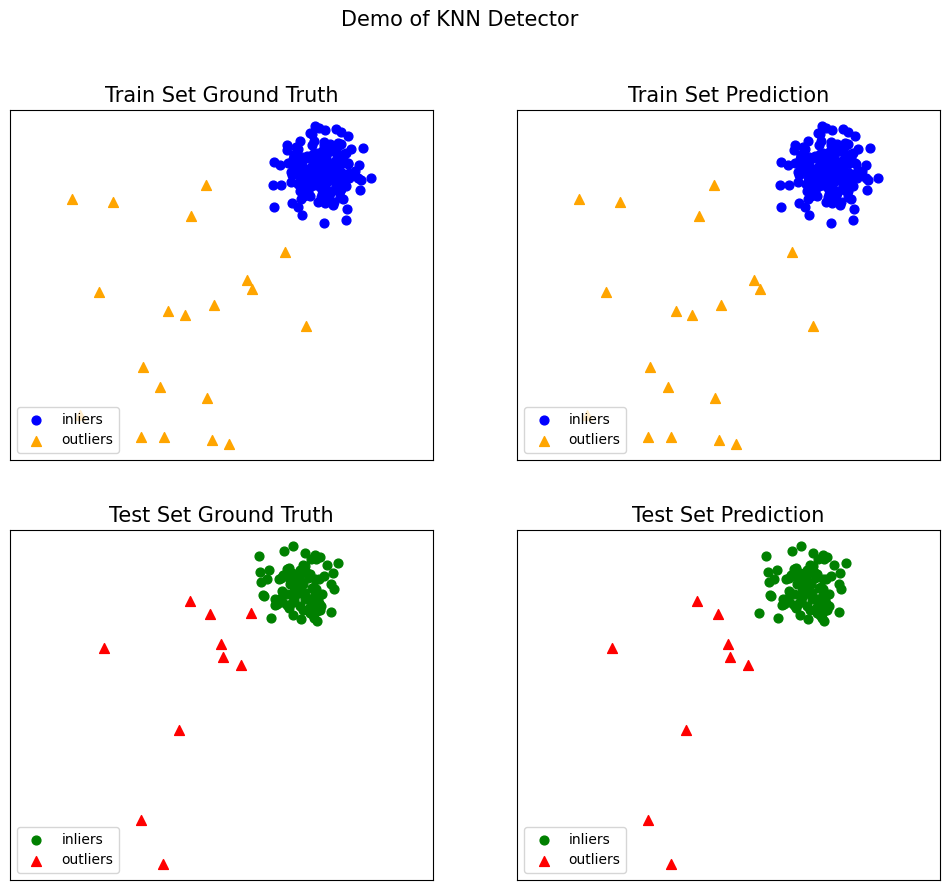

In [28]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

[Link to pyod](https://github.com/yzhao062/pyod).